In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
train_df=pd.read_csv('/content/gdrive/My Drive/Machine Hack/Melanoma Tumor Size Prediction/Train.csv')
test_df=pd.read_csv('/content/gdrive/My Drive/Machine Hack/Melanoma Tumor Size Prediction/Test.csv')

In [ ]:
train_df.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [ ]:
train_df.shape

(9146, 10)

In [ ]:
test_df.shape

(36584, 9)

In [ ]:
train_df.isnull().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

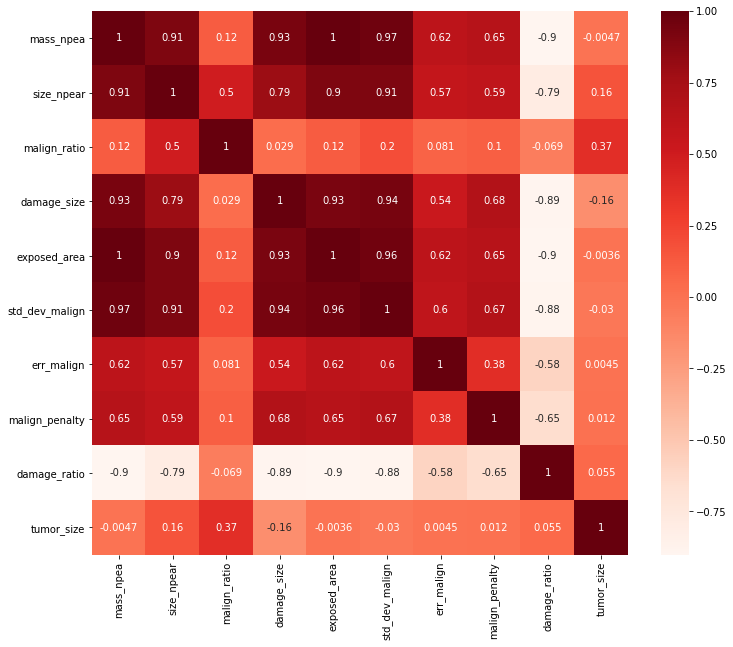

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

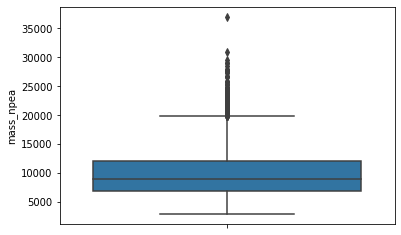

In [ ]:
sns.boxplot( y=train_df["mass_npea"] )

In [ ]:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

mass_npea           5131.530000
size_npear          1847.087500
malign_ratio           0.083950
damage_size           70.196475
exposed_area      733395.980550
std_dev_malign        86.397600
err_malign          1486.895000
malign_penalty        60.000000
damage_ratio           8.515850
tumor_size            11.016000
dtype: float64


In [ ]:
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
train_df.shape

(8329, 10)

In [ ]:
train_df.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.4870,2758.76,72,39.3620,14.103
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.0930,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.0150,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.4140,3263.35,57,35.0200,18.023
5,6851.09,2195.18,0.32041,72.8283,9.484467e+05,97.1881,3688.57,40,36.3481,1.709


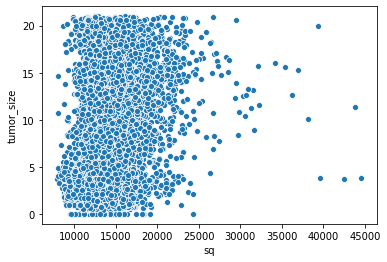

In [ ]:
sns.scatterplot(train_df['sq'],train_df['tumor_size'])

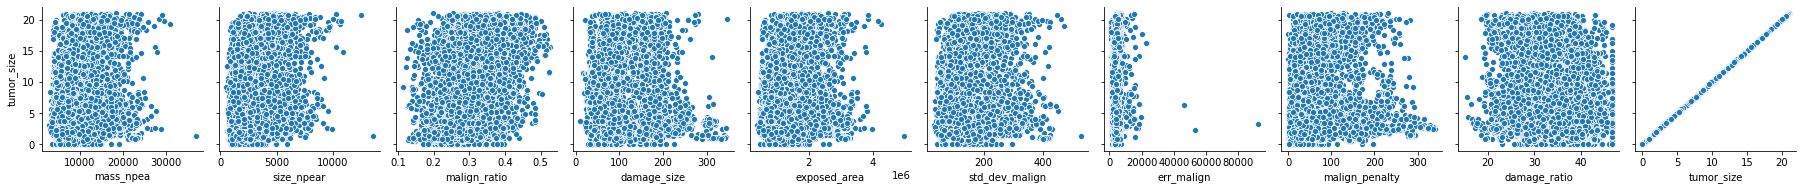

In [ ]:
sns.pairplot(train_df, y_vars="tumor_size", x_vars=train_df.columns.values)

In [ ]:
train_df.columns

Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio', 'tumor_size', 'sq'],
      dtype='object')

In [ ]:
X = train_df[['mass_npea','size_npear','malign_ratio','damage_size','std_dev_malign','exposed_area','err_malign','malign_penalty','damage_ratio']]
y = train_df[['tumor_size']]
main_test=test_df
y.head()

,tumor_size
0,14.103
2,1.688
3,3.796
4,18.023
5,1.709


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#sc_X = MinMaxScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#main_test=sc_X.transform(main_test)
y_train=y_train.to_numpy()
y_train=y_train.ravel()
y_test=y_test.to_numpy()
y_test=y_test.ravel()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model_params={
    
    'random_forest':{
        'model':ExtraTreesRegressor(),
        'params':{
            'n_estimators':[50,60,70,80,75,85,95],
            'max_features':['auto','sqrt','log2',0.1,0.4],
            'max_depth':[10,20,30,40,50,60],
            'min_samples_split':[10,15,20,25,30],
            'criterion':['mse'],
            'min_samples_leaf':[1,2,4,5,8,10]
        }
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

In [ ]:
rf = ExtraTreesRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False...
                   iid=

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
from sklearn.model_selection import cross_val_score
model = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6077, verbose=0, warm_start=False)
#regressor=model.fit(X_train,y_train)
scores = cross_val_score(model, X_train,y_train, cv=10)


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.59 (+/- 0.03)


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred = regressor.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

3.813212593959738


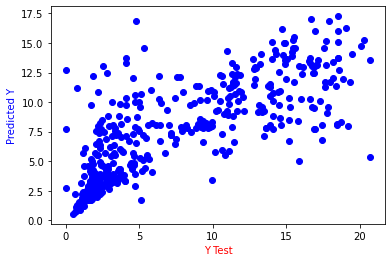

In [ ]:
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test').set_color("red")
plt.ylabel('Predicted Y').set_color("blue")

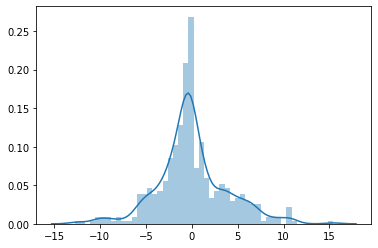

In [ ]:
sns.distplot((y_test-y_pred),bins=50);

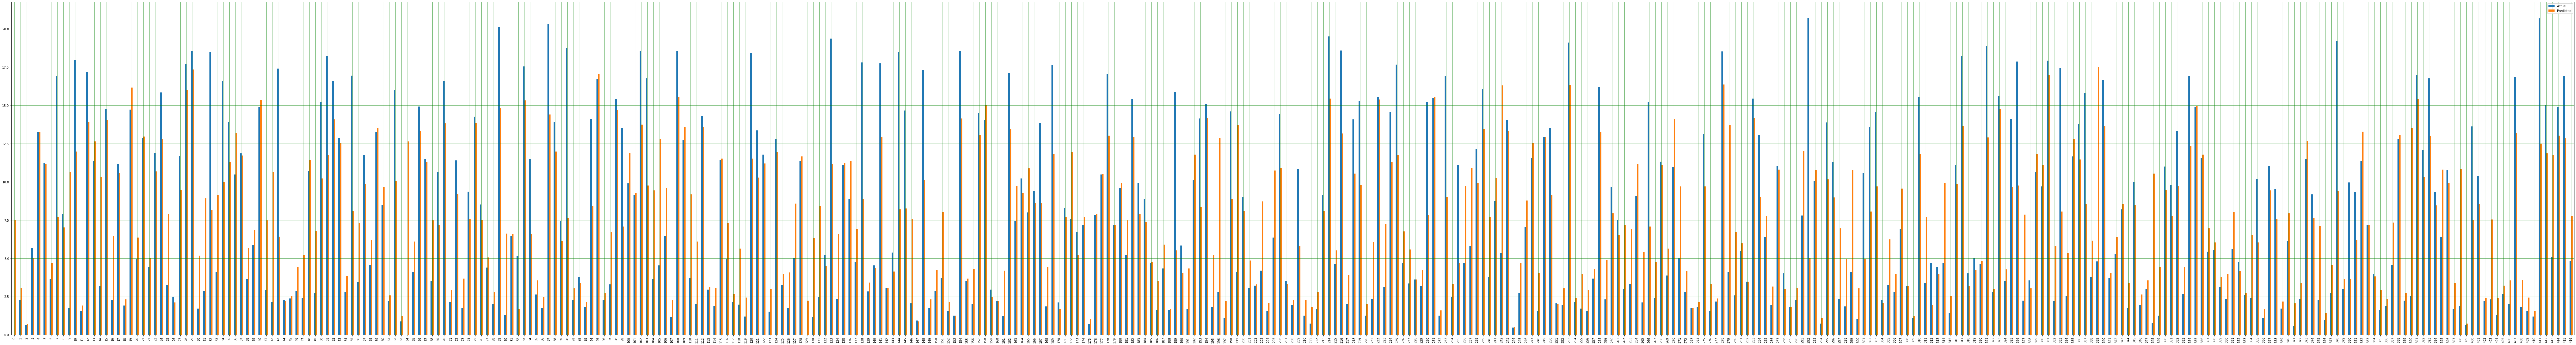

In [ ]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='bar',figsize=(150,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
actual_pred=regressor.predict(main_test)

In [ ]:
sub_mission=pd.read_csv("/content/gdrive/My Drive/Machine Hack/Melanoma Tumor Size Prediction/sample_submission.csv")
sub_mission.head()

,tumor_size
0,3.418762
1,7.348026
2,3.096391
3,10.489805
4,27.416072


In [ ]:
pred_df=pd.DataFrame(actual_pred,columns=['tumor_size'])


In [ ]:
pred_df.head()

,tumor_size
0,9.409595
1,10.912888
2,7.192930
3,12.229395
4,9.500370


In [ ]:
pred_df.to_csv('final_submission19.csv',index=False)

In [ ]:
sub_df=pd.read_csv('/content/gdrive/My Drive/Machine Hack/Power Plant Output Prediction/sample_submission.csv')

In [ ]:
sub_df.head()

,PE
0,472.459382
1,493.673699
2,496.046368
3,480.007971
4,445.407637
